In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# __Generate New Features : Polynomial__

Relationship between variables often appear to be unlinear. Thus, when you still wanna use linear model (logistic regression and linear regression) you can add polynomial features.

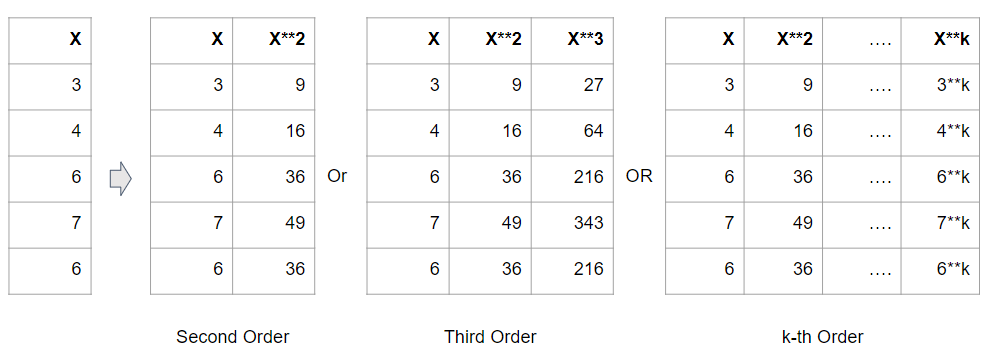

In [2]:
#Import library

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In the illustration below, you can see how is the effect of the polynomial feature. We will do modeling twice. First, without polynomial features. Second, with polynomial features. The target variabel is
1. (+) a good quality wine : quality > 6
1. (-) a bad quality wine : quality <= 6

<br>
Features: alcohol and density

In [3]:
#Input dataset

wine = pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [4]:
#Mengecek jumlah data yg kosong tiap kolomnya

wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [5]:
#Mengisi data yg kosong di kolom alkohol
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)

#Membuat kolom baru dengan mengkategorikan wine quality menjadi 2 kualitas wine
wine['label'] = np.where(wine['quality']>6,1,0)
wine['label'].value_counts()

0    422
1     98
Name: label, dtype: int64

In [6]:
#Menghapus row yg masih kosong (sisa 1 yg null jadi dropna aja)

wine.dropna(inplace=True)

In [7]:
#Mengecek kembali jumlah null per kolom

wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
label                   0
dtype: int64

In [8]:
#Menentukkan variabel dependen dan independen

X = wine[['density', 'alcohol']]
y = wine['label']

In [9]:
#Melakukan data splitting

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=2020)

> ### __MODEL 1: Klasifikasi (Logreg) Tanpa Polynomial__

In [10]:
#1. Membuat model logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [11]:
#2. Melakukan prediksi

y_pred = logreg.predict(X_test)

In [12]:
#3. Melakukan model performance

print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.8615384615384616


__Accuracy yang didapatkan sebesar 86%__

> ### __MODEL 2: Klasifikasi (Logreg) Dengan Polynomial__

Hasil dari model yg dilakukan polynomial sulit dilakukan interpretasikan, jadi lebih cocok untuk prediksi.

In [13]:
#1. Melakukan polynomial feature

poly = PolynomialFeatures(degree = 3, include_bias=False)
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
#Mendapatkan feature name

poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [15]:
X_train.head()

,density,alcohol
483,0.9964,9.2
369,0.9941,11.6
160,0.9948,12.4
114,0.9968,9.1
371,0.9931,10.6


In [16]:
#2. menampilkan hasil polynom dalam dataframe

pd.DataFrame(X_train_poly, columns = poly.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,0.9964,9.2,0.992813,9.16688,84.64,0.989239,9.133879,84.335296,778.688
1,0.9941,11.6,0.988235,11.53156,134.56,0.982404,11.463524,133.766096,1560.896
2,0.9948,12.4,0.989627,12.33552,153.76,0.984481,12.271375,152.960448,1906.624
3,0.9968,9.1,0.993610,9.07088,82.81,0.990431,9.041853,82.545008,753.571
4,0.9931,10.6,0.986248,10.52686,112.36,0.979443,10.454225,111.584716,1191.016
...,...,...,...,...,...,...,...,...,...
384,0.9969,10.4,0.993810,10.36776,108.16,0.990729,10.335620,107.824704,1124.864
385,0.9948,12.4,0.989627,12.33552,153.76,0.984481,12.271375,152.960448,1906.624
386,0.9962,9.5,0.992414,9.46390,90.25,0.988643,9.427937,89.907050,857.375
387,0.9995,8.8,0.999000,8.79560,77.44,0.998501,8.791202,77.401280,681.472


In [17]:
#3. Melakukan model fitting

logreg = LogisticRegression()
logreg.fit(X_train_poly, y_train)

LogisticRegression()

In [18]:
#4. Melakukan prediksi

y_pred = logreg.predict(X_test_poly)

In [19]:
#5. Melakukan model performance: accuracy score

print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.9461538461538461


__Setelah dilakukan polynom, hasil accuracy naik dari 86% menjadi 94%__

> ### __MODEL 3: Regressi (Linear, Lasso, & Ridge) Tanpa Polynomial__

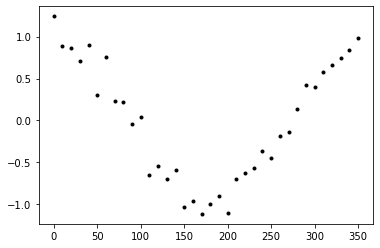

In [20]:
#1. Membuat dataset sederhana

np.random.seed(1)
x = np.arange(0, 360, 10)
y = np.cos(x * np.pi/180) + np.random.normal(0,0.15,len(x))

#2. Dijadikan dalam dataframe dan plot
df_poly = pd.DataFrame({'x':x, 'y':y})
plt.plot(df_poly['x'], df_poly['y'], 'k.')
plt.show()

In [21]:
#3. Melakukan model fitting

from sklearn.linear_model import Lasso, LinearRegression, Ridge

lrp = LinearRegression()
rip = Ridge(alpha=1)
lap = Lasso(alpha=2)

lrp.fit(df_poly[['x']], df_poly['y'])
rip.fit(df_poly[['x']], df_poly['y'])
lap.fit(df_poly[['x']], df_poly['y'])


Lasso(alpha=2)

In [22]:
#4. Melakukan predict dan memasukkan hasilnya ke dalam dataframe

df_poly['linear'] = lrp.predict(df_poly[['x']])
df_poly['ridge'] = rip.predict(df_poly[['x']])
df_poly['lasso'] = lap.predict(df_poly[['x']])

df_poly.head()

,x,y,linear,ridge,lasso
0,0,1.243652,0.080355,0.080354,0.047922
1,10,0.893044,0.074548,0.074548,0.043969
2,20,0.860467,0.068741,0.068741,0.040015
3,30,0.705080,0.062935,0.062934,0.036062
4,40,0.895856,0.057128,0.057128,0.032109


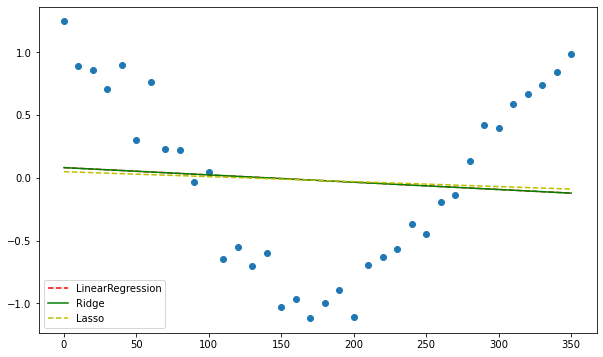

In [23]:
#5. Membuat plot

plt.figure(figsize=(10,6))
plt.scatter(df_poly['x'], df_poly['y'])
plt.plot(df_poly['x'], df_poly['linear'], 'r--', label='LinearRegression')
plt.plot(df_poly['x'], df_poly['ridge'], 'g-', label='Ridge')
plt.plot(df_poly['x'], df_poly['lasso'], 'y--', label='Lasso')
plt.legend()

plt.show()

In [24]:
#6. Mengecek nilai correlation

df_poly[['x', 'y']].corr()

#nilai mendekati 0 berarti tidak linear, jadi pake nomial

,x,y
x,1.000000,-0.085534
y,-0.085534,1.000000


> ### __MODEL 4: Regressi (Linear, Lasso, & Ridge) Dengan Polynomial__

In [25]:
#1. Melakukan polynomial feature

poly = PolynomialFeatures(3, include_bias=False)
feature_poly = poly.fit_transform(df_poly[['x']])

In [26]:
#2. Membuat dataframe hasil polynom

poly_df = pd.DataFrame(feature_poly, columns=poly.get_feature_names())
poly_df['y'] = df_poly['y']

poly_df.head()

,x0,x0^2,x0^3,y
0,0.0,0.0,0.0,1.243652
1,10.0,100.0,1000.0,0.893044
2,20.0,400.0,8000.0,0.860467
3,30.0,900.0,27000.0,0.705080
4,40.0,1600.0,64000.0,0.895856


In [27]:
#3. Melakukan model fitting linear regression dengan fit x0 dan x0^2

lr_poly = LinearRegression().fit(poly_df[['x0', 'x0^2']], poly_df['y'])

In [28]:
#4.Melakukan prediksi dan hasilnya dimasukkan ke dataframe

poly_df['y_pred'] = lr_poly.predict(poly_df[['x0', 'x0^2']])
poly_df.head()

,x0,x0^2,x0^3,y,y_pred
0,0.0,0.0,0.0,1.243652,1.451325
1,10.0,100.0,1000.0,0.893044,1.210495
2,20.0,400.0,8000.0,0.860467,0.983490
3,30.0,900.0,27000.0,0.705080,0.770309
4,40.0,1600.0,64000.0,0.895856,0.570954


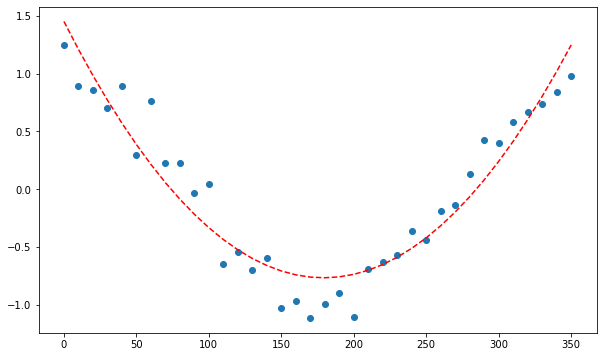

In [29]:
#5. Membuat plot

plt.figure(figsize=(10,6))
plt.scatter(poly_df['x0'], poly_df['y'])
plt.plot(poly_df['x0'], poly_df['y_pred'], 'r--', label='LinearRegression')

plt.show()